In [1]:
import sqil_core as sqil
import numpy as np
import matplotlib.pyplot as plt

from laboneq.dsl.quantum import QPU
from laboneq_applications.qpu_types.tunable_transmon import (
    TunableTransmonOperations,
    TunableTransmonQubit,
)
from helpers.sqil_transmon.qubit import SqilTransmon
from helpers.sqil_transmon.operations import SqilTransmonOperations

from laboneq_applications.experiments.options import (
    ResonatorSpectroscopyExperimentOptions,
)
from laboneq_applications.core import validation
from laboneq.dsl.enums import AcquisitionType
from laboneq.simple import Experiment, SweepParameter, dsl

from laboneq.dsl.quantum.quantum_element import QuantumElement
from numpy.typing import ArrayLike

%matplotlib inline

In [2]:
params = {
    'ext_lo': 11e9
}

2025-05-13 22:25:49,821 - INFO - Connecting to SGSA100 (RohdeSchwarzSGS100A)


Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/114907, firmware:4.2.366.0-5.00.232.72) in 0.05s


2025-05-13 22:25:49,872 - INFO - Successfully connected to SGSA100
2025-05-13 22:25:49,873 - INFO - Successfully connected to zi


[2025.05.13 22:25:49.879] INFO    Logging initialized from [Default inline config in laboneq.laboneq_logging] logdir is c:\Users\sqil\Desktop\code\sqil-experiments\measurements\laboneq_output\log
[2025.05.13 22:25:49.889] INFO    VERSION: laboneq 2.51.0
[2025.05.13 22:25:49.890] INFO    Connecting to data server at localhost:8004
[2025.05.13 22:25:49.893] INFO    Connected to Zurich Instruments LabOne Data Server version 25.04.0.628 at localhost:8004
[2025.05.13 22:25:49.898] WARNING SHFQC/QA:dev12183: Include the device options 'SHFQC/QC4CH' in the device setup ('options' field of the 'instruments' list in the device setup descriptor, 'device_options' argument when constructing instrument objects to be added to 'DeviceSetup' instances). This will become a strict requirement in the future.
[2025.05.13 22:25:49.902] INFO    Configuring the device setup
[2025.05.13 22:25:49.909] INFO    The device setup is configured


2025-05-13 22:25:49,912 - INFO - Turning on local oscillators before experiment


sweeps {'readout_range_out': [-30, -20], 'readout_amplitude': [0.5, 1]}
schema {'data': {'type': 'data'}, 'frequencies': {'type': 'axis', 'unit': 'Hz'}, 'sweep0': {'type': 'axis', 'name': 'readout_range_out'}, 'sweep1': {'type': 'axis', 'name': 'readout_amplitude'}}
data: (0,)
  ⌙ frequencies (Hz): (0,)
  ⌙ sweep0: (0,)
  ⌙ sweep1: (0,)
['readout_range_out', 'readout_amplitude'] (-30, 0.5)
{'readout_range_out': -30, 'readout_amplitude': 0.5}
[2025.05.13 22:25:49.928] INFO    Starting LabOne Q Compiler run...
[2025.05.13 22:25:49.945] INFO    Schedule completed. [0.015 s]
[2025.05.13 22:25:49.975] INFO    Code generation completed for all AWGs. [0.029 s]
[2025.05.13 22:25:49.977] INFO    Completed compilation step 1 of 1. [0.048 s]
[2025.05.13 22:25:49.980] INFO     ─────────────────────────────────────────────────────────────────────── 
[2025.05.13 22:25:49.982] INFO      Device              AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2025.05.13 22:25:49.983] INFO     ────────

2025-05-13 22:25:53,456 - INFO - Turning off local oscillators after experiment


(4, 101)


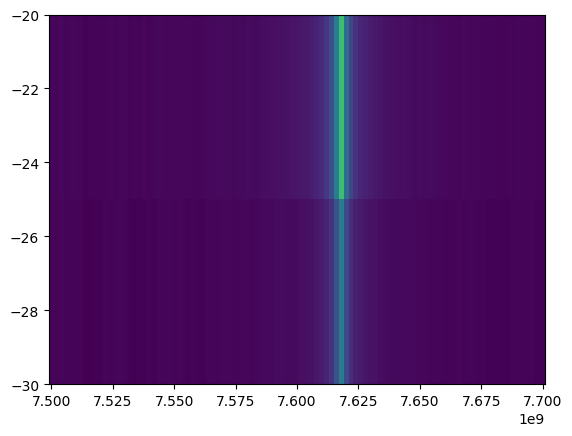

In [5]:
from rr_spec import RRSpec

rr_spec = RRSpec()
result = rr_spec.run(
    0,
    np.linspace(7.5e9, 7.7e9, 101),
    sweeps={"readout_range_out": [-30, -20], "readout_amplitude": [0.5, 1]},
)

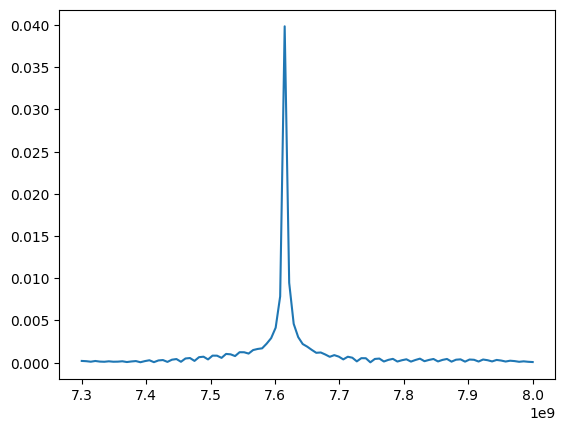

In [4]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-12\00011-rr spectroscopy_2025-05-12T231453"

data, freq = sqil.extract_h5_data(path, ["data", "frequencies"])

plt.plot(freq, np.abs(data))
plt.show()

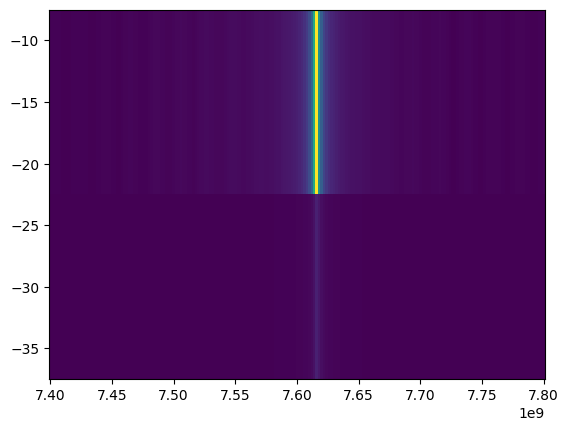

In [5]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00029-rr spectroscopy_2025-05-13T005313"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0"])

# for d, f, s in zip(data, freq, sweep):
#     plt.plot(f, np.abs(d), label=s)
# plt.legend()

plt.pcolormesh(freq[0], sweep, np.abs(data))

(201,) (2,) (2, 201)


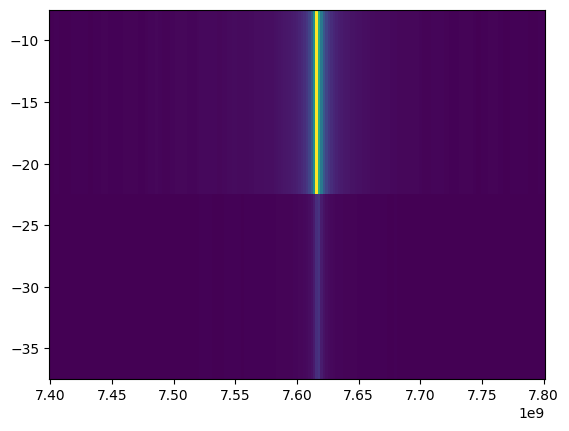

In [6]:
path = r"Z:\Projects\BottomLoader\data\20250430_Transmon_20250207_multi_Fl_NbAl_N45\2025-05-13\00429-pulsed_onetone_vs_ro_power_2025-05-13T003736"

data, freq, sweep = sqil.extract_h5_data(path, ["data", "ro_freq", "sweep_param"])
plt.pcolormesh(freq[0], sweep, np.abs(data))

print(freq[0].shape, sweep.shape, data.shape)

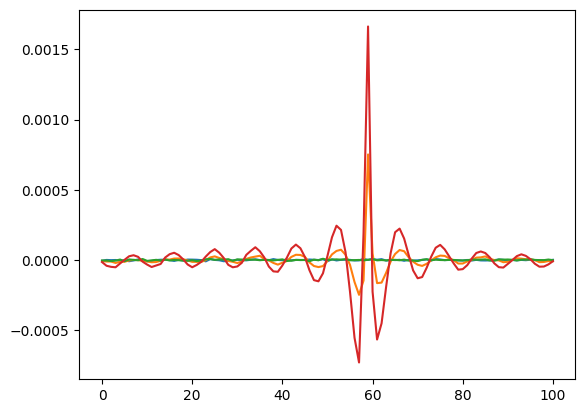

In [ ]:
path = r"C:\Users\sqil\Desktop\code\sqil-experiments\measurements\data_local\2025-05-13\00126-rr spectroscopy_2025-05-13T222549"

data, freq, sweep0, sweep1 = sqil.extract_h5_data(path, ["data", "frequencies", "sweep0", "sweep1"])

data.shape, freq.shape, sweep0.shape, sweep1.shape

plt.plot(data.T)